# Customer Segmentation for an Automobile Company

#### Problem Definition:
"An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers."

##### Data Link: https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/True/#ProblemStatement



#### Data Description 

Variable: Definition

ID: Unique ID

Gender: Gender of the customer

Ever_Married: Marital status of the customer

Age: Age of the customer

Graduated: Is the customer a graduate?

Profession: Profession of the customer

Work_Experience: Work Experience in years

Spending_Score:	Spending score of the customer

Family_Size: Number of family members for the customer (including the customer)

Var_1: Anonymised Category for the customer

Segmentation (target): Customer Segment of the customer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
NullPercentages = pd.DataFrame(data = [df_train.isna().sum()/df_train.shape[0]*100, df_test.isna().sum()/df_test.shape[0]*100], 
             index=["Train Null [%]", "Test Null [%]"]).T
NullPercentages

,Train Null [%],Test Null [%]
ID,0.000000,0.000000
Gender,0.000000,0.000000
Ever_Married,1.735250,1.903312
Age,0.000000,0.000000
Graduated,0.966782,0.913590
Profession,1.536936,1.446517
Work_Experience,10.275161,10.239817
Spending_Score,0.000000,0.000000
Family_Size,4.152206,4.301485
Var_1,0.941993,1.218120


### Null Values needs to be filled before modelling.
- Ever_Married, <br>
- Graduated, <br>
- Work_Experience, <br>
- Family_Size, <br>
- Var_1 <br>


In [5]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
print(f"Train data has {df_train.duplicated().sum()} duplicated data")
print(f"Test data has {df_test.duplicated().sum()} duplicated data")

Train data has 0 duplicated data
Test data has 0 duplicated data


### Dataset Information

#### Categorical
1- Gender,<br>
2- Ever_Married <br>
3- Graduated <br>
4- Profession <br>
5- Spending_Score --> Ordinal Variable! <br> 
6- Var_1<br>
7- Segmentation --> TARGET VARIABLE

#### Numerical
1- Age <br>
2- Work_Experience <br>
3- Family_Size <br>

### EXPLORATORY DATA ANALYSIS

In [7]:
categorical_variable = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']
numerical_variable = ['Age','Work_Experience','Family_Size']
target = ['Segmentation']

In [8]:
def num_dist(data, var):
#    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, palette='viridis')
#    ax[0].set_title(f"{var} Distribution Histogram")


    plt.show()
    
def cat_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    colors = sns.color_palette('viridis')
    df_train[var].value_counts().plot(kind="pie", autopct='%1.1f%%', explode=[0.02 for x in data[var].dropna().unique()], ax=ax[0], colors=colors) 
    ax[0].set_title(f"{var} Pie Chart")
    ax[0].set_ylabel('')

    count = sns.countplot(x=var, data=df_train, ax=ax[1], palette='viridis')
    for bar in count.patches:
        count.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=11, xytext=(0, 8),
            textcoords='offset points')
    ax[1].tick_params(axis='x',labelrotation=90)
    ax[1].set_title(f"{var} Bar Chart")
    plt.show()


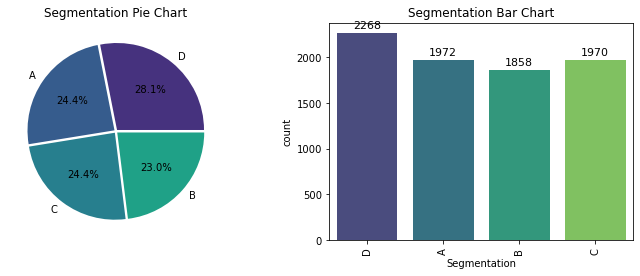

In [9]:
cat_dist(df_train, "Segmentation")

#### Segmentation's (Target Variable) shares are almost equal (BALANCED). It will be an advantage while predicting the new categories.

### Predictor Variables

In [10]:
df_train[numerical_variable].describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


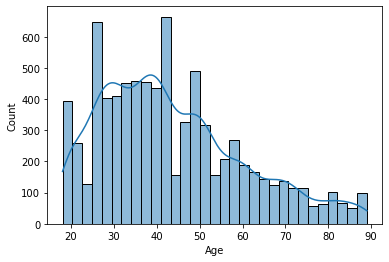

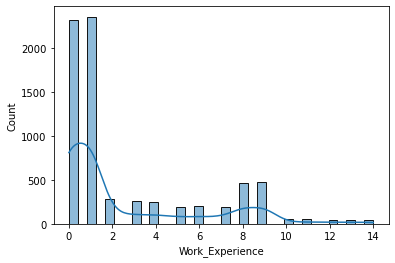

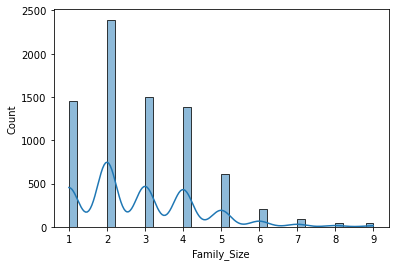

In [11]:
for var in numerical_variable:
    num_dist(df_train, var)

Majority of the customers are 26-42 year-old, have less or equal then 1 year work-experience and family size is 4 or less.

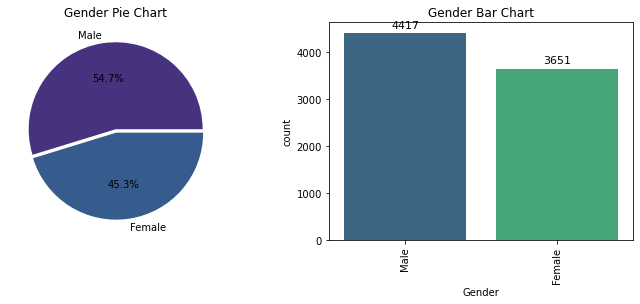

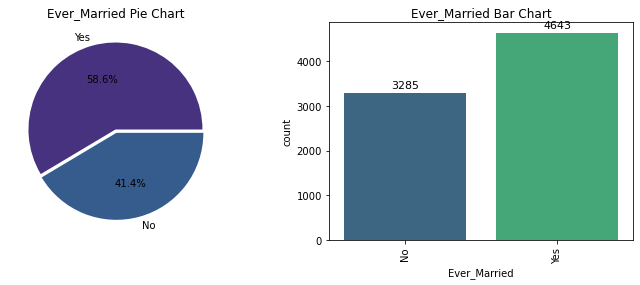

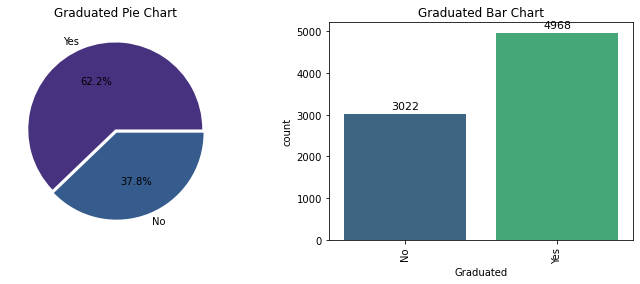

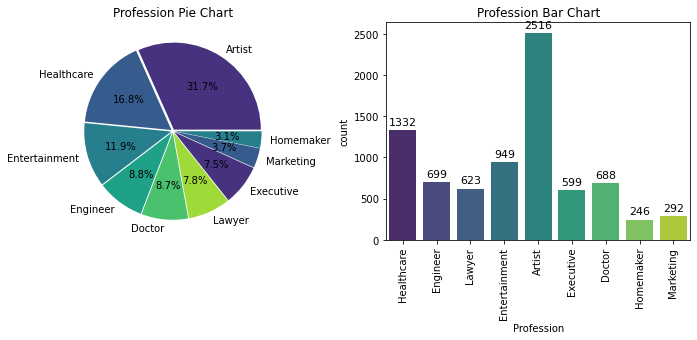

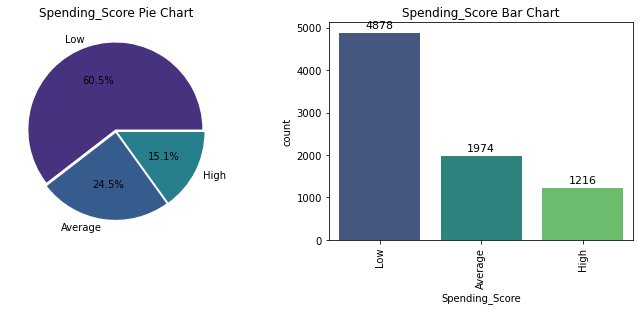

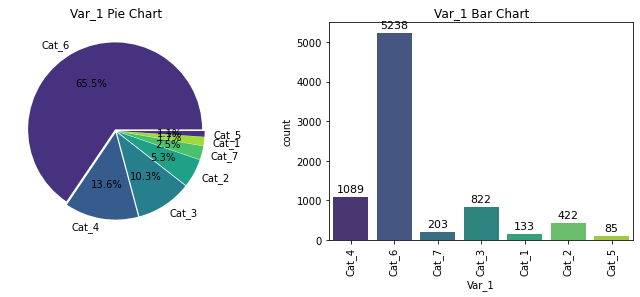

In [12]:
for var in categorical_variable:
    cat_dist(df_train, var)

Males are higher than females. <br>
Married customers are more than unmarried. <br>
Most of the customers are graduated. <br>
In Profession variable, Homemaker and Marketing categories can be merged as they are minority.


In [13]:
pd.crosstab(df_train.Segmentation, df_train.Gender)


Gender,Female,Male
Segmentation,,
A,909,1063
B,861,997
C,922,1048
D,959,1309


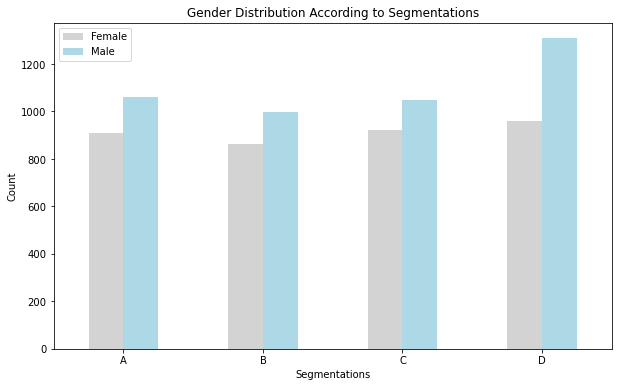

In [14]:
# Create a plot of crosstab
pd.crosstab(df_train.Segmentation, df_train.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["lightgrey", "lightblue"])

plt.title("Gender Distribution According to Segmentations")
plt.xlabel("Segmentations")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [15]:
pd.crosstab(df_train.Graduated, df_train.Gender)

Gender,Female,Male
Graduated,,
No,1303,1719
Yes,2316,2652


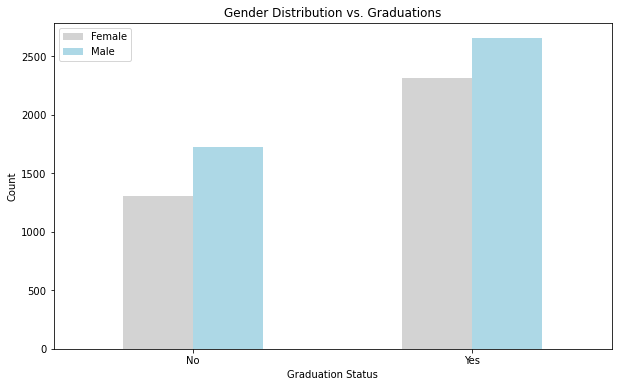

In [16]:
# Create a plot of crosstab
pd.crosstab(df_train.Graduated, df_train.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["lightgrey", "lightblue"])

plt.title("Gender Distribution vs. Graduations")
plt.xlabel("Graduation Status")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [17]:
pd.crosstab(df_train.Profession, df_train.Graduated)

Graduated,No,Yes
Profession,,
Artist,293,2209
Doctor,288,395
Engineer,385,310
Entertainment,345,592
Executive,294,300
Healthcare,844,476
Homemaker,106,138
Lawyer,230,381
Marketing,173,114


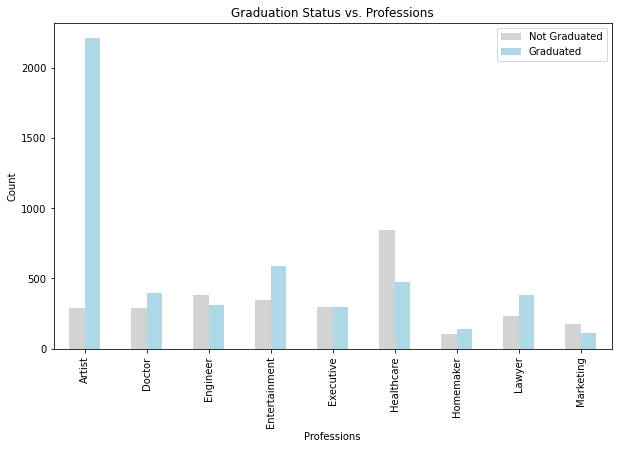

In [18]:
# Create a plot of crosstab
pd.crosstab(df_train.Profession, df_train.Graduated).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["lightgrey", "lightblue"])

plt.title("Graduation Status vs. Professions")
plt.xlabel("Professions")
plt.ylabel("Count")
plt.legend(["Not Graduated", "Graduated"]);
plt.xticks(rotation=90);

In [19]:
pd.crosstab(df_train.Profession, df_train.Gender)


Gender,Female,Male
Profession,,
Artist,1213,1303
Doctor,304,384
Engineer,559,140
Entertainment,253,696
Executive,32,567
Healthcare,557,775
Homemaker,203,43
Lawyer,307,316
Marketing,164,128


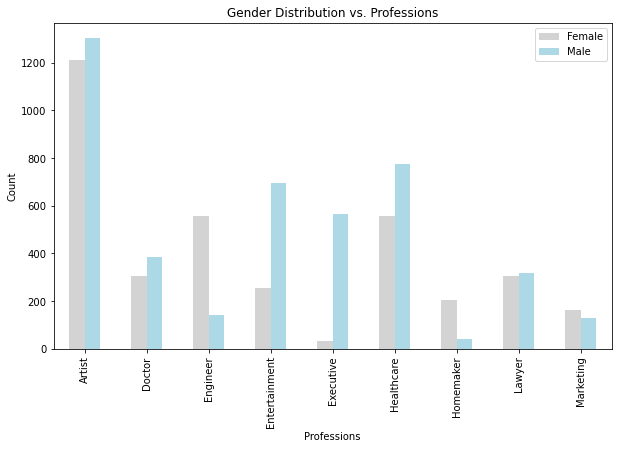

In [20]:
# Create a plot of crosstab
pd.crosstab(df_train.Profession, df_train.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["lightgrey", "lightblue"])

plt.title("Gender Distribution vs. Professions")
plt.xlabel("Professions")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=90);

In [21]:
pd.crosstab(df_train.Profession, df_train.Spending_Score).sort_values(by='High',ascending=False)

Spending_Score,Average,High,Low
Profession,,,
Executive,75,398,126
Lawyer,18,324,281
Artist,1011,242,1263
Engineer,221,60,418
Entertainment,319,46,584
Healthcare,42,45,1245
Marketing,17,33,242
Doctor,177,31,480
Homemaker,60,26,160


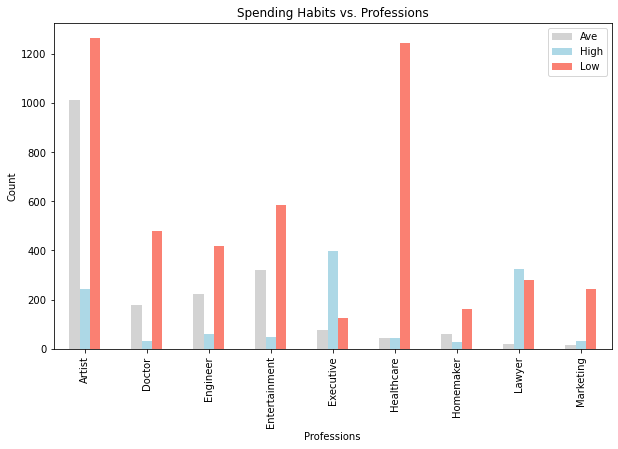

In [22]:
# Create a plot of crosstab
pd.crosstab(df_train.Profession, df_train.Spending_Score).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["lightgrey", "lightblue", "salmon"])

plt.title("Spending Habits vs. Professions")
plt.xlabel("Professions")
plt.ylabel("Count")
plt.legend(["Ave", "High", "Low"]);
plt.xticks(rotation=90);

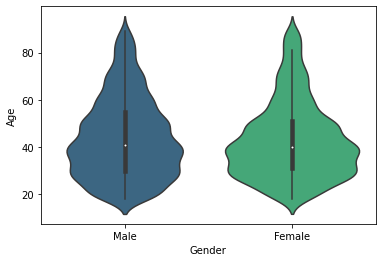

In [23]:
sns.violinplot(data=df_train, x="Gender", y="Age",split=True,palette='viridis')
plt.show()

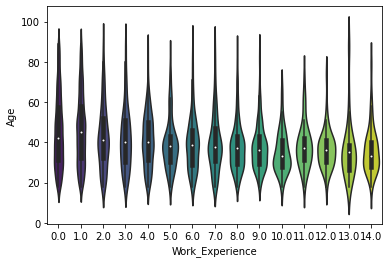

In [24]:
sns.violinplot(data=df_train, x="Work_Experience", y="Age",split=True,palette='viridis')
plt.show()

In [25]:
pd.crosstab(df_train.Ever_Married, df_train.Profession)

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Ever_Married,,,,,,,,,
No,713,366,267,358,37,1153,112,40,189
Yes,1774,311,415,579,550,145,128,575,96


## Feature Engineering

In [26]:
#Ordinal Categories
df_train['Spending_Score']=df_train['Spending_Score'].map({'High':3,'Average':2,'Low':1})

In [27]:
df_train.drop(columns='ID',inplace=True)

In [28]:
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,1,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,2,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,1,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,3,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,1,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,1,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,1,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,1,4.0,Cat_6,B


In [29]:
# Switching categorical variables into binary columns and dropping each categories' 
#first column in order to prevent collinearity.

# Target Variable (Segmentation) will be encoded, then labeled as astype("Category")
df_train_dummies = pd.get_dummies(data=df_train,columns=['Gender', 'Ever_Married', 'Graduated','Profession','Var_1'],
                          drop_first=True)

In [31]:
df_train_dummies.columns

Index(['Age', 'Work_Experience', 'Spending_Score', 'Family_Size',
       'Segmentation', 'Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_2',
       'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6',
       'Var_1_Cat_7'],
      dtype='object')

<AxesSubplot:>

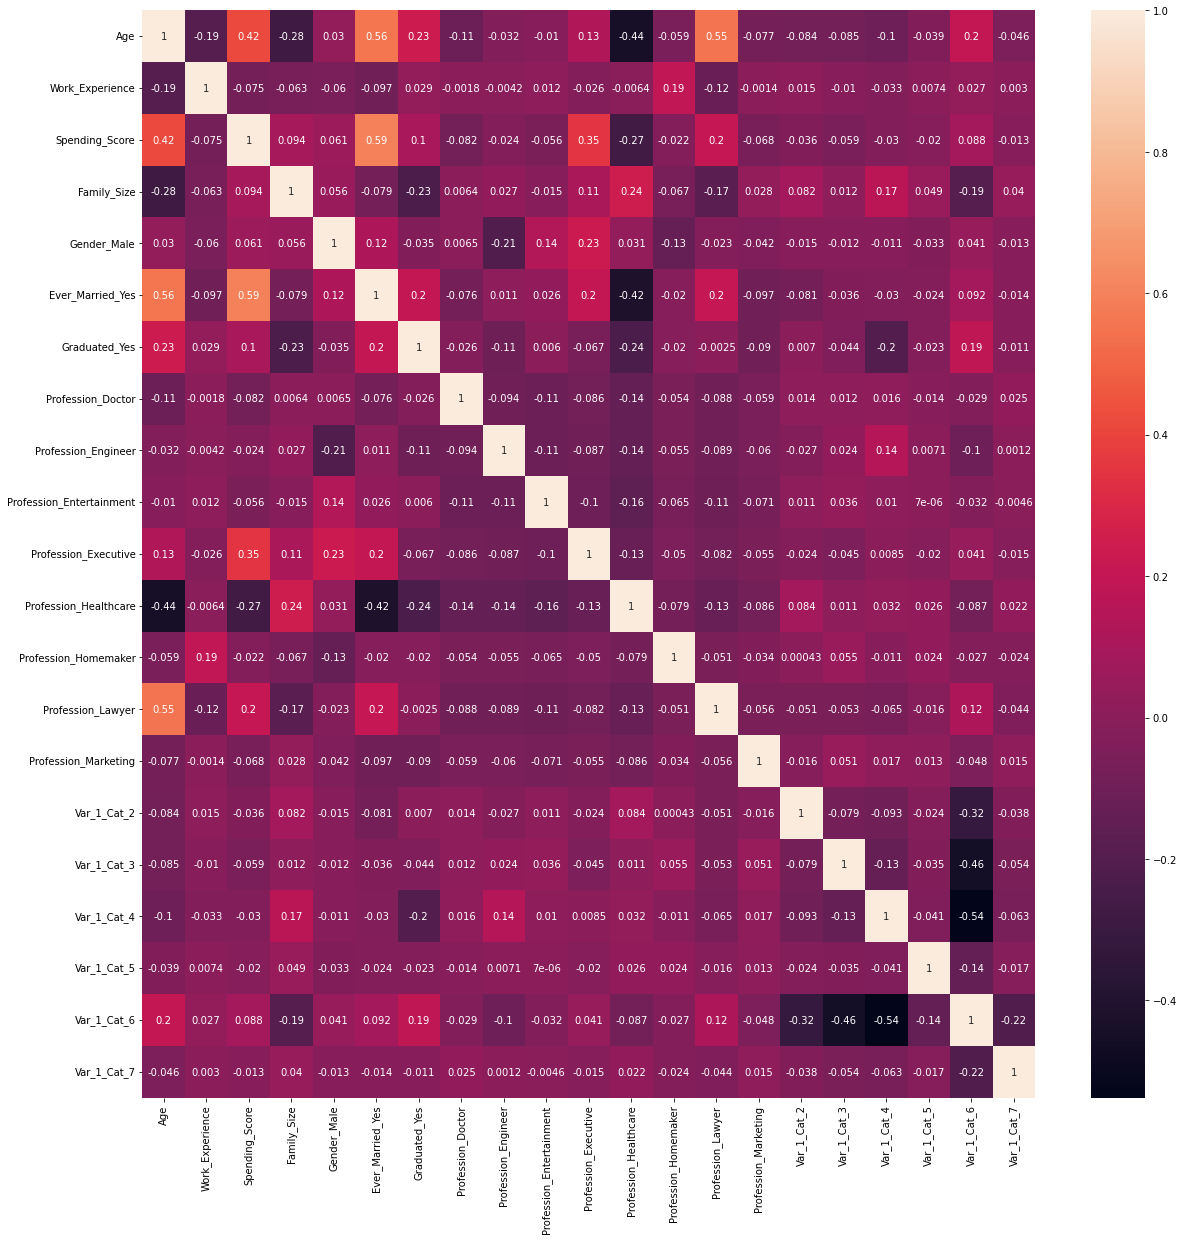

In [32]:
#Checking for Correlations
plt.figure(figsize=(20,20))
sns.heatmap(df_train_dummies.corr(), annot=True)

### HIGH CORRELATIONS (>0.5) : 
SPENDING and AGE are correlated. <br>
Being LAWYER and AGE are correlated, seems interesting ? <br>
Being MARRIED and AGE are correlated, as it is expected. <br>
Being MARRIED and SPENDING are correlated <br>
Being HEALTHCARE employee and being NOT MARRIED are correlated. <br>
Being ARTIST and being GRADUATED are correlated. <br>

### LOW CORRELATIONS (0.3 < Low Correletaion <0.5) :
Being HEALTHCARE employee and FAMILY_SIZE are correlated. <br>
Being an EXECUTIVE and SPENDING are correlated. <br>
Being HEALTHCARE employee and NOT GRADUATED are correlated. <br>

In [33]:
df_train.groupby('Ever_Married')['Age'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Ever_Married,,,,,,
No,3285,18,89,32.237747,30.0,10.767210
Yes,4643,18,89,51.477278,49.0,15.541555


Ever_Married column can be filled according to mean(Age). But I will continue with KNN Imputing. <br>

In [34]:
pd.crosstab(df_train.Ever_Married, df_train.Profession)

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Ever_Married,,,,,,,,,
No,713,366,267,358,37,1153,112,40,189
Yes,1774,311,415,579,550,145,128,575,96


### Data should be splitted before imputed and scaled in order to prevent data leakage

In [43]:
from sklearn.model_selection import train_test_split

In [37]:
# Mapping the Target Variable then changing the data type to Category

y = df_train_dummies['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})
y = y.astype('category')
y = y.cat.codes.values

In [38]:
y

array([3, 0, 1, ..., 3, 1, 1], dtype=int8)

In [39]:
X = df_train_dummies.drop(columns=['Segmentation'])

In [41]:
X.columns

Index(['Age', 'Work_Experience', 'Spending_Score', 'Family_Size',
       'Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_2',
       'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6',
       'Var_1_Cat_7'],
      dtype='object')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=20)

In [72]:
# Classifier Models from Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import SCORERS
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score

In [46]:
pipe = Pipeline([('Scaler',MinMaxScaler()), ('Imputer',KNNImputer()), ('Model',KNeighborsClassifier())])

search_space = [{'Imputer':[KNNImputer()],
                'Imputer__n_neighbors':[5,6],
                'Model':[KNeighborsClassifier()],
                'Model__n_neighbors':[5,6]},
                {'Imputer':[KNNImputer()],
                'Imputer__n_neighbors':[5,6],
                'Model':[DecisionTreeClassifier()],
               'Model__criterion':['gini'],
               'Model__min_samples_split':[2,3,4]},
               {'Imputer':[KNNImputer()],
                'Imputer__n_neighbors':[5,6],
                'Model':[RandomForestClassifier()],
               'Model__n_estimators':[1000,10000]},
               {'Imputer':[KNNImputer()],
               'Imputer__n_neighbors':[5,6],
               'Model':[XGBClassifier()],
               'Model__n_estimators':[1000,3000,5000],
               'Model__learning_rate':[0.01,0.001]}]

In [47]:
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=KFold(n_splits=5, shuffle=True, random_state=3),
                  verbose=0, scoring='accuracy', n_jobs=-1) 

best_model = clf.fit(X_train, y_train)
GridScores = best_model.cv_results_

D:\Work\Plm\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 130.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Work\Plm\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Work\Plm\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Work\Plm\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "D:\Work\Plm\Anaconda\lib\site-package

Here I received a memory error.

In [48]:
pd.DataFrame(GridScores).sort_values(by='mean_test_score',ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Imputer,param_Imputer__n_neighbors,param_Model,param_Model__n_neighbors,param_Model__criterion,param_Model__min_samples_split,...,param_Model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,347.546746,84.581813,1.270475,0.246597,KNNImputer(n_neighbors=6),6,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,...,0.001,"{'Imputer': KNNImputer(n_neighbors=6), 'Impute...",0.533695,0.532146,0.508133,0.532920,0.517054,0.524790,0.010361,1
19,382.487313,8.846700,1.840004,0.161694,KNNImputer(n_neighbors=6),5,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,...,0.001,"{'Imputer': KNNImputer(n_neighbors=6), 'Impute...",0.525174,0.529822,0.515105,0.532146,0.516279,0.523705,0.006927,2
20,77.850497,2.907492,0.595208,0.058481,KNNImputer(n_neighbors=6),6,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,...,0.01,"{'Imputer': KNNImputer(n_neighbors=6), 'Impute...",0.525949,0.529822,0.508908,0.529047,0.503876,0.519520,0.010914,3
24,281.723569,11.611933,1.506610,0.288169,KNNImputer(n_neighbors=6),6,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,...,0.001,"{'Imputer': KNNImputer(n_neighbors=6), 'Impute...",0.524400,0.522851,0.495740,0.531371,0.516279,0.518128,0.012179,4
18,235.971199,8.180871,1.239999,0.120910,KNNImputer(n_neighbors=6),5,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,...,0.001,"{'Imputer': KNNImputer(n_neighbors=6), 'Impute...",0.515105,0.524400,0.503486,0.526723,0.519380,0.517819,0.008220,5


In [49]:
pd.DataFrame(GridScores).sort_values(by='mean_test_score',ascending=False).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_Imputer', 'param_Imputer__n_neighbors', 'param_Model',
       'param_Model__n_neighbors', 'param_Model__criterion',
       'param_Model__min_samples_split', 'param_Model__n_estimators',
       'param_Model__learning_rate', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [50]:
#Number of neighbor for KNN Imputing
pd.DataFrame(GridScores).sort_values(by='mean_test_score',ascending=False).head(1)['param_Imputer__n_neighbors']

25    6
Name: param_Imputer__n_neighbors, dtype: object

In [51]:
#Number of estimators for XGB Classifier
pd.DataFrame(GridScores).sort_values(by='mean_test_score',ascending=False).head(1)['param_Model__n_estimators']

25    5000
Name: param_Model__n_estimators, dtype: object

In [52]:
#Learning Rate for XGB Classifier
pd.DataFrame(GridScores).sort_values(by='mean_test_score',ascending=False).head(1)['param_Model__learning_rate']

25    0.001
Name: param_Model__learning_rate, dtype: object

Best Algorithm is Extreme Gradient Booster Classifier with below mentioned parameters: <br>
KNN Imputer with 6 Neighbors <br>
XGBClassifier with 5000 estimators and 0.001 Learning Rate <br>

Mean Cross Validation Score is 0.52479

### I would like to compare the performance of dropping the missing rows vs. KNN Imputing

#### Will create a new search space after drop the missing rows without imputing.

In [83]:
df_dropped = df_train

In [85]:
df_dropped.shape

(8068, 10)

In [86]:
df_dropped = df_train.dropna()

In [87]:
df_dropped.shape

(6665, 10)

In [91]:
(df_train.shape[0]-df_dropped.shape[0])/df_train.shape[0]

0.1738968765493307

#### Around 17% of the data is lost by dropna() function. Let's see how this will effect the performance of the model.

In [89]:
df_dropped

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,1,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,1,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,2,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,1,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,3,5.0,Cat_6,B
8064,Male,No,35,No,Executive,3.0,1,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,1,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,1,4.0,Cat_6,B


In [92]:
df_dropped_dummies = pd.get_dummies(data=df_dropped,columns=['Gender', 'Ever_Married', 'Graduated','Profession','Var_1'],
                          drop_first=True)

In [93]:
y_dropped = df_dropped_dummies['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})
y_dropped = y_dropped.astype('category')
y_dropped = y_dropped.cat.codes.values

In [96]:
df_dropped_dummies.columns

Index(['Age', 'Work_Experience', 'Spending_Score', 'Family_Size',
       'Segmentation', 'Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_2',
       'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6',
       'Var_1_Cat_7'],
      dtype='object')

In [97]:
X_dropped = df_dropped_dummies.drop(columns=['Segmentation'])

In [103]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dropped,y_dropped,test_size=0.2,stratify=y_dropped,random_state=20)

In [104]:
pipe_d = Pipeline([('Scaler',MinMaxScaler()), ('Model',KNeighborsClassifier())])

search_space_d = [{'Model':[KNeighborsClassifier()],
                'Model__n_neighbors':[5,6]},
                {'Model':[DecisionTreeClassifier()],
               'Model__criterion':['gini'],
               'Model__min_samples_split':[2,3,4]},
               {'Model':[RandomForestClassifier()],
               'Model__n_estimators':[1000,10000]},
               {'Model':[XGBClassifier()],
               'Model__n_estimators':[1000,3000,5000],
               'Model__learning_rate':[0.01,0.001]}]

In [105]:
clf_d = GridSearchCV(estimator=pipe_d, param_grid=search_space_d, cv=KFold(n_splits=5, shuffle=True, random_state=3),
                  verbose=0, scoring='accuracy', n_jobs=-1) 

best_model_d = clf_d.fit(X_train_d, y_train_d)
GridScores_d = best_model_d.cv_results_

In [106]:
pd.DataFrame(GridScores_d).sort_values(by='mean_test_score',ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,param_Model__n_neighbors,param_Model__criterion,param_Model__min_samples_split,param_Model__n_estimators,param_Model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,73.552497,1.675384,0.316628,0.026346,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,1000,0.01,"{'Model': XGBClassifier(base_score=None, boost...",0.502343,0.513590,0.531895,0.514071,0.538462,0.520072,0.013193,1
11,146.536481,0.832869,0.592447,0.042910,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,3000,0.001,"{'Model': XGBClassifier(base_score=None, boost...",0.510778,0.507029,0.529081,0.509381,0.526266,0.516507,0.009239,2
12,235.417424,7.584085,1.004852,0.083049,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,5000,0.001,"{'Model': XGBClassifier(base_score=None, boost...",0.507966,0.507966,0.536585,0.501876,0.526266,0.516132,0.013097,3
10,52.294700,5.485715,0.195804,0.017583,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,1000,0.001,"{'Model': XGBClassifier(base_score=None, boost...",0.501406,0.490159,0.519700,0.510319,0.520638,0.508444,0.011513,4
8,220.082095,9.319923,1.005659,0.182703,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,3000,0.01,"{'Model': XGBClassifier(base_score=None, boost...",0.475164,0.505155,0.510319,0.495310,0.510319,0.499253,0.013233,5


In [108]:
#Learning Rate for XGB Classifier
pd.DataFrame(GridScores_d).sort_values(by='mean_test_score',ascending=False).head(1)['param_Model__learning_rate']

7    0.01
Name: param_Model__learning_rate, dtype: object

In [107]:
#Number of estimators for XGB Classifier
pd.DataFrame(GridScores_d).sort_values(by='mean_test_score',ascending=False).head(1)['param_Model__n_estimators']

7    1000
Name: param_Model__n_estimators, dtype: object

Best Algorithm is Extreme Gradient Booster Classifier with below mentioned parameters: <br>
XGBClassifier with 1000 estimators and 0.01 Learning Rate <br>

Mean Cross Validation Score of the method is 0.52

Deleting the rows of searching for different methodologies to impute the data would be more feasible, as the cross validation score does not differ.

### To report the expected accuracy of the model, Test data will be used.

#### I decided to continue with KNN Imputing methodology.

In [53]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
imputer = KNNImputer(n_neighbors=6)

In [55]:
imputer.fit(X_train_scaled)
X_train_imputed = imputer.transform(X_train_scaled)

In [56]:
from numpy import isnan

print('Missing Value in Train Data: %d' % sum(isnan(X_train_imputed).flatten()))

Missing Value in Train Data: 0


In [57]:
Selected_Clf = XGBClassifier(n_estimators=5000, learning_rate=0.001)

In [58]:
Selected_Clf.fit(X_train_imputed,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [59]:
# Making predictions with tuned model
y_preds = Selected_Clf.predict(X_test_scaled)

In [60]:
y_preds

array([0, 1, 2, ..., 0, 0, 1], dtype=int64)

In [61]:
np.array(y_test)

array([1, 2, 2, ..., 3, 2, 1], dtype=int8)

In [68]:
# Confusion matrix
pd.crosstab(y_test,y_preds)

col_0,0,1,2,3
row_0,,,,
0,181,68,54,91
1,99,113,122,38
2,53,62,235,44
3,97,27,15,315


In [69]:
#Accuracy Score of the model
accuracy_score(y_test,y_preds)*100

52.29244114002478

In [109]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       394
           1       0.42      0.30      0.35       372
           2       0.55      0.60      0.57       394
           3       0.65      0.69      0.67       454

    accuracy                           0.52      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.52      0.52      0.52      1614



Model predicts the 2 (Segmentation-C) and 3 (Segmentation-D) with 60% and 69% recall rate respectively, but shows a poor performance on Segmentation-B and A. Overall accuracy is around 52%.

In [76]:
y_pred_proba = Selected_Clf.predict_proba(X_test_scaled)

In [77]:
y_pred_proba

array([[0.36658227, 0.28855446, 0.23433405, 0.11052917],
       [0.272619  , 0.39796415, 0.19623692, 0.13317993],
       [0.14803816, 0.25090775, 0.57859164, 0.02246245],
       ...,
       [0.34424865, 0.3138703 , 0.22727136, 0.11460962],
       [0.32229775, 0.3025779 , 0.26626447, 0.10885984],
       [0.29571876, 0.34472954, 0.3342366 , 0.02531515]], dtype=float32)

In [79]:
y_preds

array([0, 1, 2, ..., 0, 0, 1], dtype=int64)

predict_proba function shows me the probability of the segmentations. For example, in the first row, we can clearly see that the highest probability is Segmentation-A (Category-0) with 36%.

In [82]:
roc_auc_score(y_preds,y_pred_proba,multi_class='ovr')

0.9899956874476818

AUC shows that model is almost perfect, however there is a contrast when we have a look at the Classification Report and Accuracy. I am not sure for AUC calculation approach (as I found it in youtube), and I will analyze the details. <br>

youtube link of multiclass AUC calculation approach: https://www.youtube.com/watch?v=ZlGz9Nl5irs

### Feature Importance

I will analyse the importance of the features to understand, which features effects the model and how much.

In [119]:
feature_dict = dict(zip(df_train_dummies.columns, list(Selected_Clf.feature_importances_)))

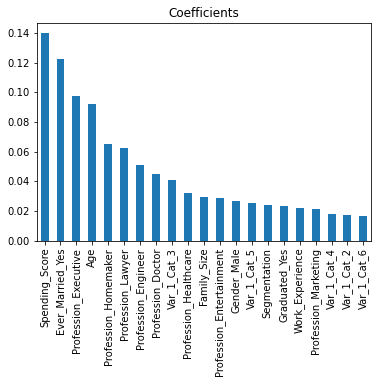

In [128]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.sort_values(by=0, ascending=False).plot.bar(title="Coefficients", legend=False);

Most 4 contributers for segmentation are:
- SPENDING SCORE, 
- Being MARRIED,
- Being an EXECUTIVE,
- and customer's AGE